# PCA

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.decomposition import PCA

## 1. Preparing data

### 1.1. 2d data

In [166]:
X = np.array([[2.5,0.5,2.2,1.9,3.1,2.3,2.0,1.0,1.5,1.1], 
              [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]])
X = X.T
print(X)

[[ 2.5  2.4]
 [ 0.5  0.7]
 [ 2.2  2.9]
 [ 1.9  2.2]
 [ 3.1  3. ]
 [ 2.3  2.7]
 [ 2.   1.6]
 [ 1.   1.1]
 [ 1.5  1.6]
 [ 1.1  0.9]]


### 1.2. Plotting data

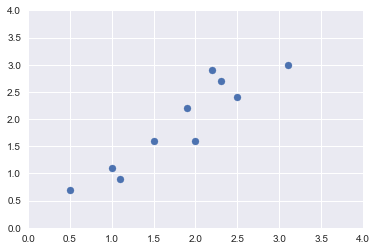

In [167]:
plt.figure(1)
plt.scatter(X[:,0], X[:,1])
plt.axis([0,4,0,4])
plt.show()

## 2. Finding PCA components (manually)

### 2.1. Normalization

In [168]:
mean_vector = np.mean(X, axis=0)
print(mean_vector)

[ 1.81  1.91]


In [169]:
norm_X = X - mean_vector
print(norm_X)

[[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]


### 2.2. Covariance matrix

In [170]:
covX = np.cov([norm_X[:,0],norm_X[:,1]])
print(covX)

[[ 0.61655556  0.61544444]
 [ 0.61544444  0.71655556]]


### 2.3. Eigen values and vectors


In [183]:
e_vals, e_vec = np.linalg.eig(covX)
print(e_vals)
print(e_vec)

[ 0.0490834   1.28402771]
[[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]


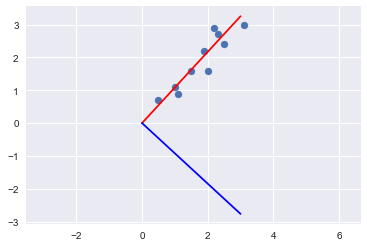

In [184]:
plt.figure(2)

plt.scatter(X[:,0], X[:,1])

x = np.linspace(0,3,100)
y1 = e_vec[0,0] / e_vec[0,1] * x
y2 = e_vec[1,0] / e_vec[1,1] * x
plt.plot(x, y1, 'r')
plt.plot(x, y2, 'b')

plt.axis('equal')
plt.show()

## 3. Dimensionality reduction

### 3.1. Finding eigen vector with max eigen value

In [185]:
w = e_vec[1,:]
w[0]=-w[0] #??
print(w)

print(e_vals[1])

[-0.6778734  -0.73517866]
1.28402771217


### 3.2. data rotation

[-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


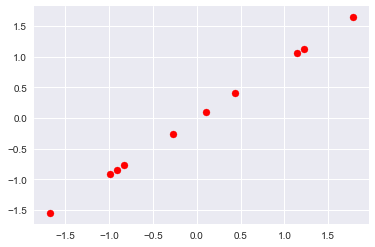

In [186]:
transX = w.T.dot(norm_X.T)
print(transX.T)

plt.figure(3)
plt.scatter(transX,e_vec[1,0] / e_vec[1,1]*transX,c='r')
plt.show()

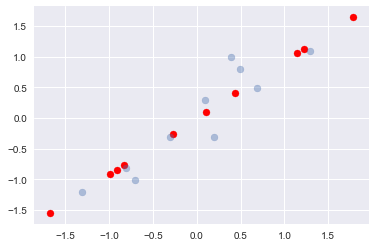

In [187]:
plt.figure(4)
plt.scatter(transX,e_vec[1,0] / e_vec[1,1]*transX,c='r')
plt.scatter(norm_X[:,0],norm_X[:,1], alpha=0.4)
plt.show()

## 4. Finding PCA with sklearn

In [188]:
pca = PCA(n_components=1)
pca.fit(X)
Xpca = pca.transform(X)
print(Xpca)
print(pca.components_)
print(pca.explained_variance_)

[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]
[[-0.6778734  -0.73517866]]
[ 1.28402771]


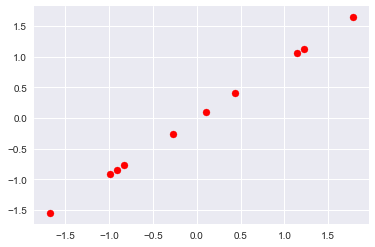

In [189]:
plt.figure(5)
plt.scatter(Xpca[:,0],Xpca[:,0]*pca.components_[0][0]/pca.components_[0][1],c='r')
plt.show()

#end